In [40]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.kepler_RK import fct_RK4_2D, k1, k2, l1, l2

In [41]:
M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

xRK4, yRK4, t, u_4, v_4 = fct_RK4_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, beta_RK, k1, k2, l1, l2, G_temp, M_soleil)

def aphelie(x, y):
    r = np.sqrt(x**2 + y**2)
    r_min = np.min(r)
    r_max = np.max(r)
    r_min_ind = np.where(r == r_min)[0][0]
    r_max_ind = np.where(r == r_max)[0][0]
    return (r_min + r_max)/2, r_min_ind, r_max_ind

a, ind_min, ind_max = aphelie(xRK4, yRK4)


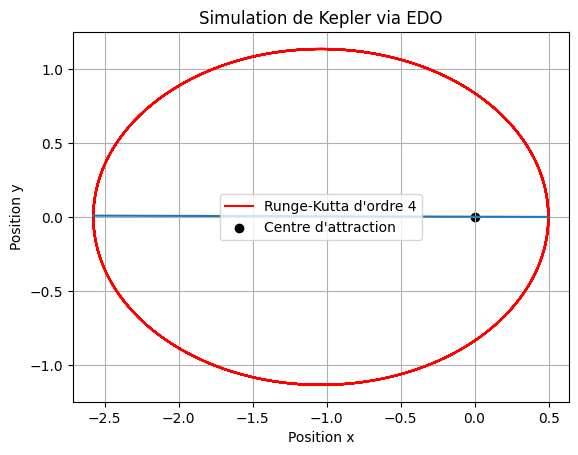

In [42]:
plt.plot(xRK4, yRK4, label="Runge-Kutta d'ordre 4", linestyle="-", color="r")
x_a = [xRK4[ind_min], xRK4[ind_max]]
y_a = [yRK4[ind_min], yRK4[ind_max]]
plt.plot(x_a, y_a)

# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()